# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ex 3.1: Load the dataset
data_path = "../data/cities_temperatures.csv"

temps_df = pd.read_csv(data_path)  # Load the CSV file

# Display the first 5 rows
temps_df.head()

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [7]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it
temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

In [10]:
print(temps_df.columns)  # Check the available column names


Index(['Country', 'City', 'AvgTemperatureFahrenheit', 'Date', 'Month', 'Year'], dtype='object')


In [15]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees

temps_df["AvgTemperatureCelsius"] = (temps_df["AvgTemperatureFahrenheit"] - 32) * 5 / 9  # Convert Fahrenheit to Celsius

# Display the updated DataFrame
temps_df


,Country,City,AvgTemperatureFahrenheit,Date,Month,Year,AvgTemperatureCelsius
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000,26.388889
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000,26.000000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000,23.500000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000,26.111111
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000,25.055556
...,...,...,...,...,...,...,...
72727,US,Washington,45.7,2019-12-27,12,2019,7.611111
72728,US,Washington,49.6,2019-12-28,12,2019,9.777778
72729,US,Washington,48.9,2019-12-29,12,2019,9.388889
72730,US,Washington,55.0,2019-12-30,12,2019,12.777778


In [17]:
# Ex 3.3: Find the number of unique cities and list them

unique_cities_list = temps_df["City"].unique().tolist()  # Get unique city names as a list
num_unique_cities = len(unique_cities_list)  # Count the number of unique cities

# Print the result
print(f"There are {num_unique_cities} different cities in the dataset.")
print("List of unique cities:", unique_cities_list)


There are 10 different cities in the dataset.
List of unique cities: ['Buenos Aires', 'Canberra', 'Bogota', 'Cairo', 'Munich', 'Calcutta', 'Tokyo', 'Dakar', 'Capetown', 'Washington']


In [18]:
# Ex 3.4: Find the minimum and maximum dates

min_date = temps_df["Date"].min()  # Get the earliest date
max_date = temps_df["Date"].max()  # Get the latest date

# Print the result
print(f"The earliest date in the dataset is {min_date}.")
print(f"The latest date in the dataset is {max_date}.")


The earliest date in the dataset is 2000-01-01.
The latest date in the dataset is 2019-12-31.


In [19]:
# Ex 3.5: Find the global minimum and maximum temperatures, along with city and date

# Find the minimum and maximum temperature values
min_temp = temps_df["AvgTemperatureCelsius"].min()
max_temp = temps_df["AvgTemperatureCelsius"].max()

# Find the corresponding rows for min and max temperature
min_temp_row = temps_df.loc[temps_df["AvgTemperatureCelsius"] == min_temp].iloc[0]
max_temp_row = temps_df.loc[temps_df["AvgTemperatureCelsius"] == max_temp].iloc[0]

# Extract city and date for min and max temperatures
min_temp_city = min_temp_row["City"]
min_temp_date = min_temp_row["Date"]

max_temp_city = max_temp_row["City"]
max_temp_date = max_temp_row["Date"]

# Print the results
print(f"The lowest recorded temperature was {min_temp:.2f}°C in {min_temp_city} on {min_temp_date}.")
print(f"The highest recorded temperature was {max_temp:.2f}°C in {max_temp_city} on {max_temp_date}.")


The lowest recorded temperature was -16.78°C in Munich on 2000-01-25.
The highest recorded temperature was 37.89°C in Cairo on 2019-05-23.


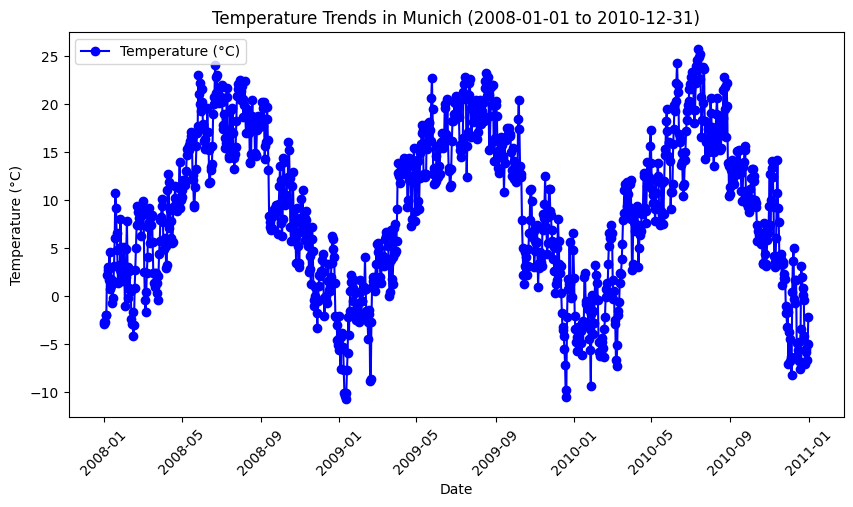

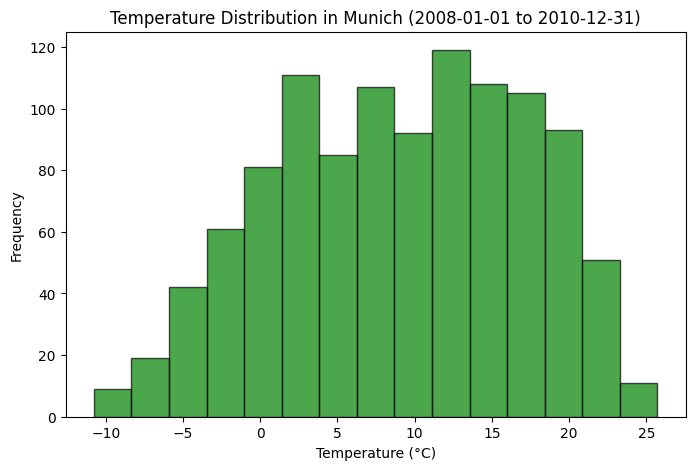

In [20]:
# Ex 3.6: For a given city and a range of dates (start and end)
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

import matplotlib.pyplot as plt
import pandas as pd

# Define city and date range
city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

# Filter the dataset for the selected city
city_df = temps_df[temps_df["City"] == city]

# Filter for the selected date range
city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]

# Plot the line graph of temperature over time
plt.figure(figsize=(10, 5))
plt.plot(city_df_period["Date"], city_df_period["AvgTemperatureCelsius"], label="Temperature (°C)", color="b", marker="o")

# Adding titles and labels
plt.title(f"Temperature Trends in {city} ({start_date} to {end_date})")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

plt.show()

# Plot the histogram of temperature readings
plt.figure(figsize=(8, 5))
plt.hist(city_df_period["AvgTemperatureCelsius"], bins=15, color="g", alpha=0.7, edgecolor="black")

# Adding titles and labels
plt.title(f"Temperature Distribution in {city} ({start_date} to {end_date})")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")

plt.show()



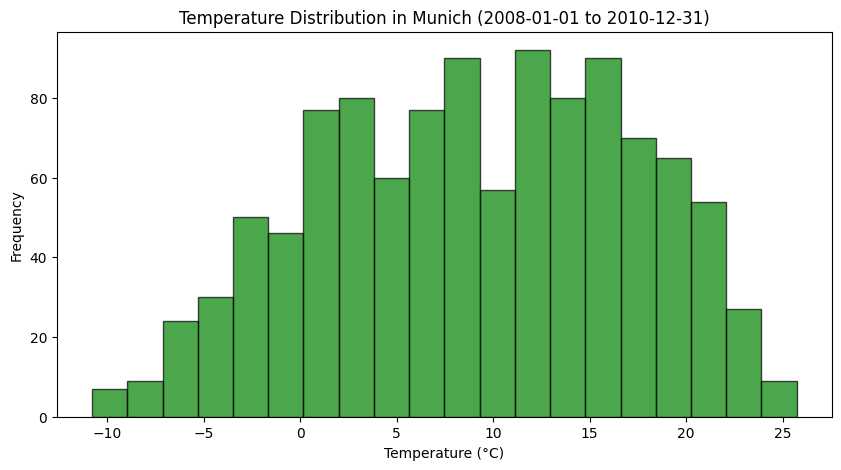

In [22]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot

plt.figure(figsize=(10, 5))

# Plot the histogram using the AvgTemperatureCelsius column with 20 bins
plt.hist(city_df_period["AvgTemperatureCelsius"], bins=20, color="g", alpha=0.7, edgecolor="black")

# Add titles and labels
plt.title(f"Temperature Distribution in {city} ({start_date} to {end_date})")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")

# Show the plot
plt.show()


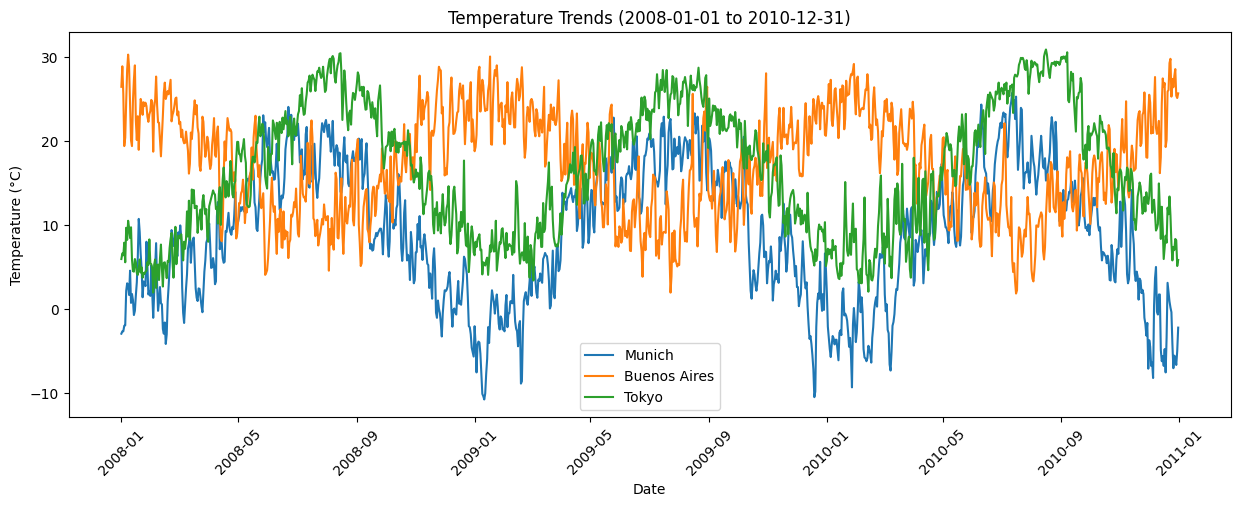

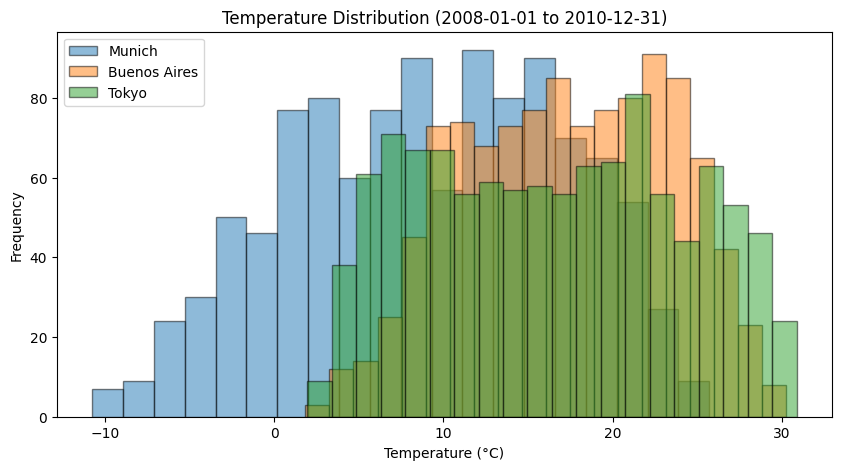

In [23]:
# Ex 3.7: Plot temperature trends for multiple cities

# Define selected cities and date range
selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

# Create the line plot
plt.figure(figsize=(15, 5))

# Loop through each selected city and plot its temperature trend
for city in selected_cities:
    city_df = temps_df[temps_df["City"] == city]  # Filter for the city
    city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]  # Filter for the date range
    plt.plot(city_df_period["Date"], city_df_period["AvgTemperatureCelsius"], label=city)  # Plot each city

# Add titles and labels
plt.title(f"Temperature Trends ({start_date} to {end_date})")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

plt.show()

# Create the histogram
plt.figure(figsize=(10, 5))

# Loop through each selected city and plot its temperature distribution
for city in selected_cities:
    city_df = temps_df[temps_df["City"] == city]  # Filter for the city
    city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]  # Filter for the date range
    plt.hist(city_df_period["AvgTemperatureCelsius"], bins=20, alpha=0.5, label=city, edgecolor="black")  # Plot each city

# Add titles and labels
plt.title(f"Temperature Distribution ({start_date} to {end_date})")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()

plt.show()


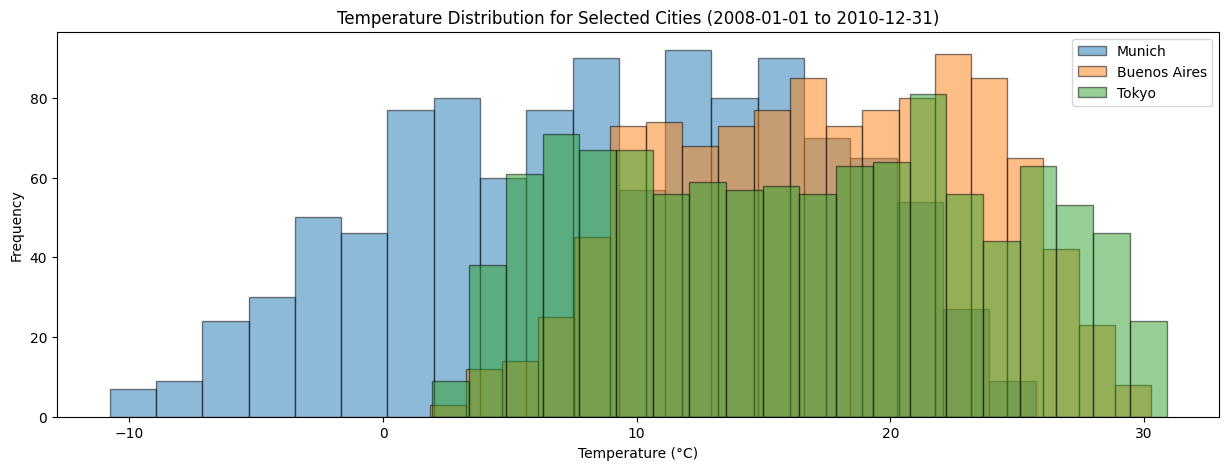

In [24]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one

plt.figure(figsize=(15, 5))

# Loop through each selected city and plot its temperature distribution
for city in selected_cities:
    city_df = temps_df[temps_df["City"] == city]  # Filter for the city
    city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]  # Filter for the date range
    plt.hist(city_df_period["AvgTemperatureCelsius"], bins=20, alpha=0.5, label=city, edgecolor="black")  # Plot each city histogram

# Add titles and labels
plt.title(f"Temperature Distribution for Selected Cities ({start_date} to {end_date})")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

